# Лабораторна робота 4

**Тема:** Бінарна класифікація на основі даних Titanic

1. Ознайомлення з даними

In [5]:
# Імпорт необхідних бібліотек для ознайомлення з даними
import pandas as pd

# Завантаження та огляд даних
data = pd.read_csv('train.csv')
print(data.head(10))
print(data.describe())
print(data.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

2. Попередня обробка даних

In [6]:
# Імпорт бібліотек для обробки та аналізу даних
import numpy as np

# Заповнення пропусків та кодування
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
data['FamilySize'] = data['SibSp'] + data['Parch']


C:\Users\kingg\AppData\Local\Temp\ipykernel_24832\4190918084.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
C:\Users\kingg\AppData\Local\Temp\ipykernel_24832\4190918084.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

3. Поділ даних на тренувальну та тестову вибірки

In [8]:
# Імпорт функції для поділу даних
from sklearn.model_selection import train_test_split

# Поділ на ознаки та мітки
X = data.drop(columns=['Survived'])
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


4. Побудова моделей

In [9]:
# Імпорт моделей для класифікації
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Створення та тренування моделей
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier()
}
for model_name, model in models.items():
    model.fit(X_train, y_train)


ValueError: could not convert string to float: 'Boulos, Mrs. Joseph (Sultana)'

5. Оцінка моделей

In [10]:
# Імпорт метрик для оцінки
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Оцінка точності та метрик моделей
results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }


ValueError: could not convert string to float: 'Yousseff, Mr. Gerious'

6. Побудова матриці плутанини

In [ ]:
# Імпорт бібліотеки для візуалізації
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Матриця плутанини для кожної моделі
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()


Logical regression cross Validation Scores:  [0.81818182 0.76923077 0.86619718 0.75352113 0.73239437]
Average CV Score:  0.7879050526937851
Number of CV Scores used in Average:  5 
--------------
Decision tree cross Validation Scores:  [0.8041958  0.77622378 0.87323944 0.79577465 0.77464789]
Average CV Score:  0.8048163104501134
Number of CV Scores used in Average:  5 
--------------


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.8553530976066188


7. ROC-криві та AUC

In [ ]:
# Імпорт функцій для побудови ROC-кривих
from sklearn.metrics import roc_curve, auc

# ROC-криві для кожної моделі
plt.figure()
for model_name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{model_name} AUC: {auc(fpr, tpr):.2f}')
plt.legend()
plt.plot([0, 1], [0, 1], 'k--')
plt.show()


Decision Tree stats:
Accuracy: 0.7486033519553073
Precision: 0.7638888888888888
Recall: 0.6626506024096386
F1 Score: 0.7096774193548387

Random Forest stats:
Accuracy: 0.7374301675977654
Precision: 0.7571428571428571
Recall: 0.6385542168674698
F1 Score: 0.6928104575163399

Logistic Regression stats:
Accuracy: 0.8324022346368715
Precision: 0.863013698630137
Recall: 0.7590361445783133
F1 Score: 0.8076923076923077



8. Оптимізація моделі

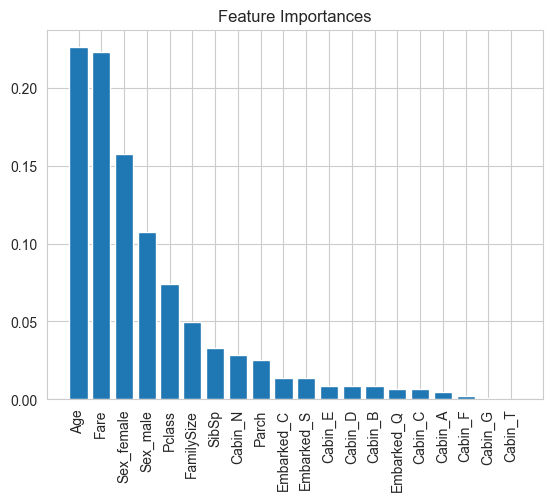

In [ ]:
# Імпорт бібліотек для крос-валідації та оптимізації
from sklearn.model_selection import cross_val_score, GridSearchCV

# Крос-валідація для логістичної регресії та дерева рішень
cv_scores_lr = cross_val_score(models['LogisticRegression'], X_train, y_train, cv=5)
cv_scores_dt = cross_val_score(models['DecisionTree'], X_train, y_train, cv=5)

# Оптимізація гіперпараметрів для Random Forest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(models['RandomForest'], rf_params, cv=5)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_


9. Аналіз важливості ознак

In [ ]:
# Важливість ознак для випадкового лісу
feature_importances = pd.Series(best_rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances.plot(kind='bar')
plt.show()
